# **Loading the data:**

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Project 2 Team 3/data/SBAnational.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Cleaning:**

In [9]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [10]:
df = df.rename(columns={'LoanNr_ChkDgt':'ID'})

In [11]:
df = df.drop(['BalanceGross'], axis=1)

In [12]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace('$','')
df['DisbursementGross'] = df['DisbursementGross'].str.replace(',','')
df['DisbursementGross'] = df['DisbursementGross'].str.strip()
df['DisbursementGross'] = pd.to_numeric(df['DisbursementGross'])

df['GrAppv'] = df['GrAppv'].str.replace('$','')
df['GrAppv'] = df['GrAppv'].str.replace(',','')
df['GrAppv'] = df['GrAppv'].str.strip()
df['GrAppv'] = pd.to_numeric(df['GrAppv'])

df['SBA_Appv'] = df['SBA_Appv'].str.replace('$','')
df['SBA_Appv'] = df['SBA_Appv'].str.replace(',','')
df['SBA_Appv'] = df['SBA_Appv'].str.strip()
df['SBA_Appv'] = pd.to_numeric(df['SBA_Appv'])

<ipython-input-12-279807a05c63>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['DisbursementGross'] = df['DisbursementGross'].str.replace('$','')
<ipython-input-12-279807a05c63>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GrAppv'] = df['GrAppv'].str.replace('$','')
<ipython-input-12-279807a05c63>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['SBA_Appv'] = df['SBA_Appv'].str.replace('$','')


In [13]:
df.head()

,ID,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,0,N,Y,NaN,28-Feb-99,60000.0,P I F,$0.00,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,0,N,Y,NaN,31-May-97,40000.0,P I F,$0.00,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,0,N,N,NaN,31-Dec-97,287000.0,P I F,$0.00,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,0,N,Y,NaN,30-Jun-97,35000.0,P I F,$0.00,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,0,N,N,NaN,14-May-97,229000.0,P I F,$0.00,229000.0,229000.0


In [14]:
df.isna().sum() / len(df) * 100

ID                    0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.015125
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.503579
LowDoc                0.287156
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64

In [15]:
# #deleting columns with more than 25% missing data
# df = df.drop('ChgOffDate',axis=1)

In [16]:
df.dtypes

ID                     int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
MIS_Status            object
ChgOffPrinGr          object
GrAppv               float64
SBA_Appv             float64
dtype: object

In [17]:
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])

In [18]:
df['LowDoc'].unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

In [19]:
# if df['MIS_Status'] == 'P I F':
#   df['MIS_Status'] = 0
# elif df['MIS_Status'] == 'CHGOFF':
#   df['MIS_Status'] = 1

df.MIS_Status.replace(['P I F','CHGOFF'],[0, 1], inplace = True)
# df.LowDoc.replace(['Y','N'],[1,0], inplace = True)
# w.female.replace(to_replace=dict(female=1, male=0), inplace=True)

In [20]:
df['MIS_Status'].unique()
df.head()

,ID,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,0,N,Y,NaN,1999-02-28,60000.0,0.0,$0.00,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,0,N,Y,NaN,1997-05-31,40000.0,0.0,$0.00,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,0,N,N,NaN,1997-12-31,287000.0,0.0,$0.00,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,0,N,Y,NaN,1997-06-30,35000.0,0.0,$0.00,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,0,N,N,NaN,1997-05-14,229000.0,0.0,$0.00,229000.0,229000.0


##Data Exploration

In [21]:
df.corr()**2

,ID,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
ID,1.000000,0.000782,0.003699,0.009959,0.000082,0.001602,0.000488,5.505156e-04,2.143358e-03,0.022004,0.003268,0.030144,0.004754,0.005968
Zip,0.000782,1.000000,0.001158,0.021338,0.000200,0.001510,0.000013,1.350102e-05,1.299201e-04,0.005300,0.008531,0.000009,0.009891,0.011197
NAICS,0.003699,0.001158,1.000000,0.012326,0.001462,0.002214,0.001550,1.338641e-03,7.728164e-04,0.190728,0.002263,0.011242,0.003195,0.003982
Term,0.009959,0.021338,0.012326,1.000000,0.002129,0.005344,0.000761,6.215333e-04,8.375360e-04,0.041649,0.217520,0.098672,0.252617,0.275533
NoEmp,0.000082,0.000200,0.001462,0.002129,1.000000,0.001618,0.000074,2.356194e-04,4.065685e-05,0.001749,0.007859,0.000690,0.008178,0.008568
NewExist,0.001602,0.001510,0.002214,0.005344,0.001618,1.000000,0.000005,8.331636e-05,1.541383e-02,0.001005,0.005536,0.000412,0.004423,0.004093
CreateJob,0.000488,0.000013,0.001550,0.000761,0.000074,0.000005,1.000000,9.879425e-01,1.078200e-06,0.000895,0.000048,0.000142,0.000067,0.000189
RetainedJob,0.000551,0.000014,0.001339,0.000622,0.000236,0.000083,0.987943,1.000000e+00,2.655216e-07,0.000618,0.000106,0.000153,0.000114,0.000222
FranchiseCode,0.002143,0.000130,0.000773,0.000838,0.000041,0.015414,0.000001,2.655216e-07,1.000000e+00,0.000014,0.003549,0.000235,0.004610,0.004822
UrbanRural,0.022004,0.005300,0.190728,0.041649,0.001749,0.001005,0.000895,6.175556e-04,1.426069e-05,1.000000,0.001227,0.025117,0.003467,0.005006


In [22]:
df['MIS_Status'].unique()

array([ 0.,  1., nan])

In [23]:
df['RetainedJob'].unique()

array([   0,    7,   23,    4,    6,    1,    9,   20,    2,    5,   19,
          8,    3,   10,   24,   12,   15,   11,   25,   44,   17,   14,
         65,   28,   38,   16,   42,   26,   18,   13,   50,   93,   40,
         37,   60,   21,   30,   31,   34,   35,  150,   22,   73,   41,
         45,  100,  180,   58,   75,  165,   36,  130,   29,   27,  125,
         99,   46,   32,  257,   43,   47,   80,   70,   54,   62,   33,
         39,  400,   55,   95,   48,  120,   71,   63,   81,   52,   94,
         78,  160,  109,   86,   77,  155,   85,   90,   64, 3225,   61,
         69,   66,  210,  107,   97,   51,   83,  112,   53,   72,   76,
         87,   68,  118,  138,   67,   57,   56,  117,  171,  229,  115,
        275,  153,  300,  105,  140,  135,   59,   79,  200,  295,  205,
        206,  128,  186,  137,  250,   89,   49,  131,   92,  404,  110,
        320,  139,   82,  108,   88,  104,  114,  134,  230,  102,  103,
         96,   98,   84,  101,  220,  233,   74,  2

In [24]:
group = df.groupby('UrbanRural').agg({'DisbursementGross':np.mean,'GrAppv':np.mean,'SBA_Appv':np.mean})

##Linear Regression 1


In [25]:
from sklearn.linear_model import LinearRegression

X = df[['DisbursementGross','GrAppv','SBA_Appv']]
y = df[['Term']]

lr =LinearRegression()

lr.fit(X,y)
preds = lr.predict(X)

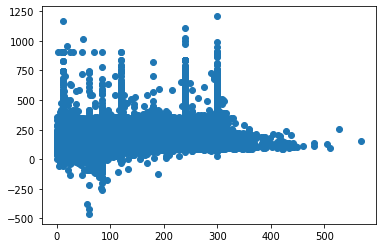

In [26]:
plt.scatter(x = df['Term'], y = preds)

In [27]:
df['avg'] = (df['DisbursementGross']*df['GrAppv']*df['SBA_Appv'])/3

X2 = df[['DisbursementGross','GrAppv','SBA_Appv','avg']]
y2 = df[['Term']]

lr2 =LinearRegression()

lr2.fit(X2,y2)
preds2 = lr2.predict(X2)

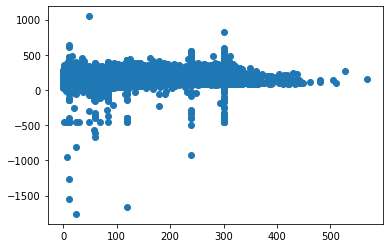

In [28]:
plt.scatter(df['Term'],preds2)

##Linear Regression 2

In [29]:
# for x in df['FranchiseCode']:
#   if x == np.nan: 
#     drop


In [30]:
len(df)

899164

In [31]:
df= df.dropna()


In [32]:
len(df)

160871

In [33]:
df.head()
df.isna().sum()

ID                   0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
ChgOffDate           0
DisbursementDate     0
DisbursementGross    0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
avg                  0
dtype: int64

In [34]:
df.columns

Index(['ID', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'avg'],
      dtype='object')

In [35]:
df['FranchiseCode'].unique

<bound method Series.unique of 6             0
36            1
43            0
58            1
60            1
          ...  
899131        1
899138    54100
899143        1
899153        1
899162        1
Name: FranchiseCode, Length: 160871, dtype: int64>

In [36]:
X2 = df[['UrbanRural','FranchiseCode','NewExist']]
y2 = df[['DisbursementGross']]

lr.fit(X2,y2)
preds2 = lr.predict(X2)

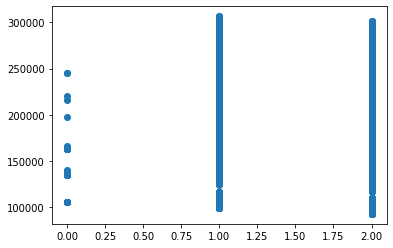

In [37]:
plt.scatter(df['NewExist'], preds2)

In [38]:
from sklearn.linear_model import LogisticRegression

X = df[['DisbursementGross','GrAppv','SBA_Appv']]
y = df[['UrbanRural']]

logr = LogisticRegression()

logr.fit(X,y)
preds3 = logr.predict_proba(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
len(df['UrbanRural'])

160871

In [40]:
len(preds3)

160871

In [41]:
df['UrbanRural'].head()

6     0
36    0
43    0
58    1
60    0
Name: UrbanRural, dtype: int64

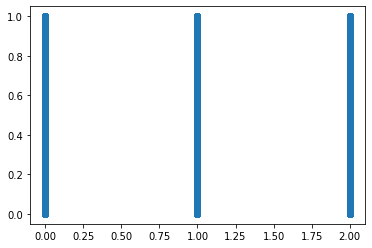

In [42]:
plt.scatter(x = df['UrbanRural'], y = preds3[:,1])

In [43]:
# sum(df['UrbanRural'],preds3)/len(df)

##Predicting Default 

In [44]:
df.columns

Index(['ID', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'avg'],
      dtype='object')

In [45]:
df.dtypes

ID                            int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate                 object
ApprovalFY                   object
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate                   object
DisbursementDate     datetime64[ns]
DisbursementGross           float64
MIS_Status                  float64
ChgOffPrinGr                 object
GrAppv                      float64
SBA_Appv                    float64
avg                         float64
dtype: object

In [46]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=10000)

X = df[['Term','UrbanRural','GrAppv','SBA_Appv']]
y = df['MIS_Status']

logr.fit(X,y)
Default_pred = logr.predict(X)

Default_df = df[df['MIS_Status'] == 1]
Nondefault_df  = df[df['MIS_Status'] == 0]

Default_X = Default_df[['Term','UrbanRural','GrAppv','SBA_Appv']]
Default_y = Default_df['MIS_Status']

Nondefault_X = Nondefault_df[['Term','UrbanRural','GrAppv','SBA_Appv']]
Nondefault_y = Nondefault_df['MIS_Status']
# Default_df.head()

In [47]:
X.head()

,Term,UrbanRural,GrAppv,SBA_Appv
6,45,0,600000.0,499998.0
36,137,0,47000.0,37600.0
43,120,0,200000.0,150000.0
58,167,1,1350000.0,1012500.0
60,7,0,25000.0,12500.0


In [48]:
#calculating the accuracy 

sum(Default_pred == df['MIS_Status'])/len(df)

0.9696837839013869

In [50]:
from sklearn.model_selection import train_test_split


nondef_X_train,nondef_X_test,nondef_y_train,nondef_y_test = train_test_split(Nondefault_X,Nondefault_y,train_size = 0.7)
num_default = len(nondef_X_train)

def_X_train,def_X_test,def_y_train,def_y_test = train_test_split(Default_X,Default_y,train_size = num_default)


X_train = pd.concat([def_X_train, nondef_X_train])
y_train = pd.concat([def_y_train, nondef_y_train])

X_test = pd.concat([def_X_test, nondef_X_test])
y_test = pd.concat([def_y_test, nondef_y_test])

In [51]:
y_train.value_counts()

1.0    3413
0.0    3413
Name: MIS_Status, dtype: int64

In [52]:
logr2 = LogisticRegression(max_iter = 1000)

logr2.fit(X_train,y_train)
default_pred_train = logr2.predict(X_test)

In [53]:
logr.coef_

array([[ 9.99448777e-03,  1.24331914e+00,  2.71829439e-05,
        -2.24540846e-05]])

In [54]:
sum(default_pred_train == y_test)/len(y_test)

0.7147521828037262

In [55]:
from sklearn.metrics import confusion_matrix

cm_rate = confusion_matrix(y_test,default_pred_train, normalize = 'true')
cm = confusion_matrix(y_test,default_pred_train)

In [56]:
cm_rate

array([[0.53278689, 0.46721311],
       [0.28350188, 0.71649812]])

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score

r2 = r2_score(y_test,default_pred_train)
mse = mean_squared_error(y_test, default_pred_train)

precision = cm[:1,:1]/(cm[:1,:1]+cm[1:,:1])
recall = cm[:1,:1]/(cm[:1,:1]+cm[:1,1:])
auroc = roc_auc_score(y_test,default_pred_train)

In [58]:
print('r2 = ' + str(r2))
print('mse = ' + str(mse))
print('precision = ' + str(precision))
print('recall = ' + str(recall))
print('Auroc Score = ' + str(auroc))

r2 = -29.302329004825275
mse = 0.2852478171962738
precision = [[0.01771238]]
recall = [[0.53278689]]
Auroc Score = 0.6246425037773541
